# Bike Sharing Demand Project

## Project Goal
1. Use train data to analyze user patterns
2. Based on obtained user pattern, predict future demand

**`Goal`: Predict future bike rental demand**


---
## EDA notebook

### Index

1. Load data
    1. Overall check of dataset before EDA
2. EDA train data
    1. continuous variable relation
    2. categorical variable relation
    3. analyze relation among variables
    
       
    
## 1. Load Data

In [134]:
## import pandas, seaborn, matplotlib, numpy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [135]:
test = pd.read_csv("Bike_test.csv")
train = pd.read_csv("Bike_train.csv")

In [243]:
## check data set size and first 5 rows
print(train.shape)
train.head()

(10886, 17)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,datetime2,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01 00:00:00,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01 01:00:00,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01 02:00:00,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01 03:00:00,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01 04:00:00,2011,1,1,4


In [211]:
train.dtypes

datetime              object
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
datetime2     datetime64[ns]
year                   int64
month                  int64
day                    int64
hour                   int64
dtype: object

In [244]:
## check columns names
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'datetime2', 'year', 'month', 'day', 'hour'],
      dtype='object')

In [138]:
## check existing null values in the data set
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [139]:
## check duplicates
#sum(train.duplicated())
train.duplicated().sum()

0

In [141]:
## check data types of the data set
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


## 2. EDA Train Data

- Relation between weather and bike demand (which type of days [ex:sunny, rainy] increases the demand of bike rental?)
- Will there be more demand on holidays than workingdays? 
    - month, day, time usage
- Are bikes mostly used for commute or recreation purpose?
    - based on time period of the rental
- What are biggest differences between casual and registered users on bike usage? 
    - number of rentals per month, average rental hours, rental time distribution, etc...


### Preprocessing


In [245]:
# First, create a new column "datetime2" with 'datetime' data type
train['datetime2'] = pd.to_datetime(train['datetime'])

In [246]:
# Next, break down "datetime" column into year, month, day, and hour. Because 'datetime' column data doesn't include minutes and seconds, hour will be the smallest time variable here.
train['year'] = train['datetime2'].dt.year
train['month'] = train['datetime2'].dt.month
train['day'] = train['datetime2'].dt.day
train['hour'] = train['datetime2'].dt.hour

train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,datetime2,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01 00:00:00,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01 01:00:00,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01 02:00:00,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01 03:00:00,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01 04:00:00,2011,1,1,4


In [145]:
#Let's see which months are corresponding to which season
train.groupby(['season', 'month'])[['month']].count()

month
season month       
1      1        884
       2        901
       3        901
2      4        909
       5        912
       6        912
3      7        912
       8        912
       9        909
4      10       911
       11       911
       12       912

In [249]:
# Average temperature by month
train.groupby(['season','month'])[['temp']].mean()

temp
season month           
1      1       9.840000
       2      11.798535
       3      15.902175
2      4      18.718372
       5      22.674079
       6      27.064496
3      7      30.841711
       8      29.736689
       9      25.779032
4      10     20.933853
       11     15.185752
       12     13.831206

- Since months are not categorized by actual seasons (Season1-Spring is actually March,April,May but in our dataset, Season1 indicates first three months)
Thus we'll define "season" as "quarters"

- Also, average temperature of the city where this data came from is quite warm and even during winter season, the temperature doesn't go below zero.

# Numerical Data Relation

First, let's look at categorical variables 

- weather
- temp
- atemp
- humidity
- windspeed


In [146]:
#Let's see correspondence of numerical data columns
train[['weather', 'temp', 'atemp', 'humidity', 'windspeed']].corr()

,weather,temp,atemp,humidity,windspeed
weather,1.000000,-0.055035,-0.055376,0.406244,0.007261
temp,-0.055035,1.000000,0.984948,-0.064949,-0.017852
atemp,-0.055376,0.984948,1.000000,-0.043536,-0.057473
humidity,0.406244,-0.064949,-0.043536,1.000000,-0.318607
windspeed,0.007261,-0.017852,-0.057473,-0.318607,1.000000


<AxesSubplot:title={'center':'Correlation of Features'}>

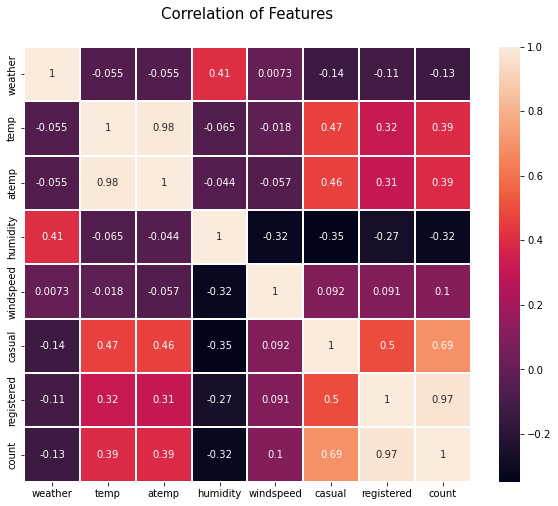

In [255]:
#Create a heatmap for above corr() chart
plt.figure(figsize=(10, 8))
plt.title("Correlation of Features", y = 1.05, size = 15)
sns.heatmap(train[['weather', 'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']].corr(), linewidths = 0.1, vmax = 1.0 ,
            square = False, linecolor = "white", annot = True, annot_kws = {"size" : 10})

- The heatmap correlation shows that 'temperature' has closest relation on number of rental counts, not 'weather'

- Also, 'casual' users have higher correlation on temperature than 'registered' users.
    - My assumption is that this is probably because the temperature influences people to spontaneously rent bikes

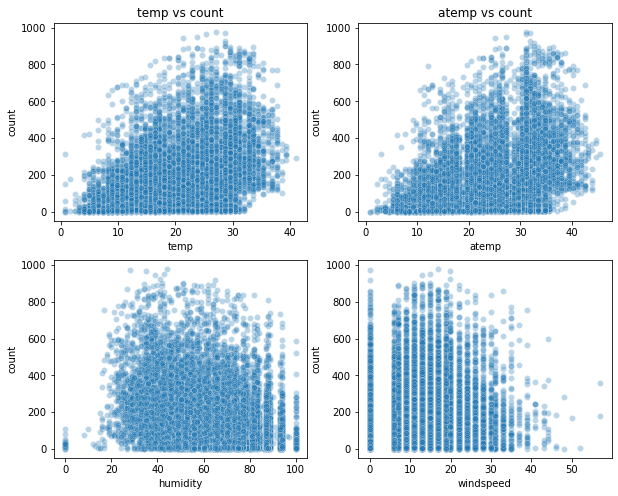

In [167]:
fig, axs = plt.subplots(2,2, figsize=(10, 8))
ax1, ax2, ax3, ax4 = axs.flatten()

axs1 = sns.scatterplot(x='temp', y='count', data = train, ax = ax1, alpha = 0.3).set(title='temp vs count')
axs2 = sns.scatterplot(x='atemp', y='count', data = train, ax = ax2, alpha = 0.3).set(title='atemp vs count')
axs3 = sns.scatterplot(x='humidity', y='count', data = train, ax = ax3, alpha = 0.3)
axs4 = sns.scatterplot(x='windspeed', y='count', data = train, ax = ax4, alpha = 0.3)

- Not surprisingly, when both the temp and atemp are between 20~30, the rental counts get highest
- number of counts decrease as humidity goes oabove 80, but overall, humidity doesn't have much impact on rental
- As long as windspeed is below 35, the # of rental doesn't fluctuate

# Categorical Data Relation

Now let's look at categorical variables 

- season
- holiday
- workingday
- weather
- time

---

### 1. Registered vs Casual user percentage

In [262]:
# Let's see casual/registered user percentage

casual_user_percentage = round((train['casual'].sum() / train['count'].sum()*100.0),2)
registered_user_percentage = round((train['registered'].sum() / train['count'].sum()*100.0),2)

print('Registered, Casual users percentage rates are: ', [casual_user_percentage, registered_user_percentage])

Registered, Casual users percentage rates are:  [18.8, 81.2]


---

- Not surprisingly, majority of the users are causal users.

---

### 2. Rental usage per year, month, day, and hour

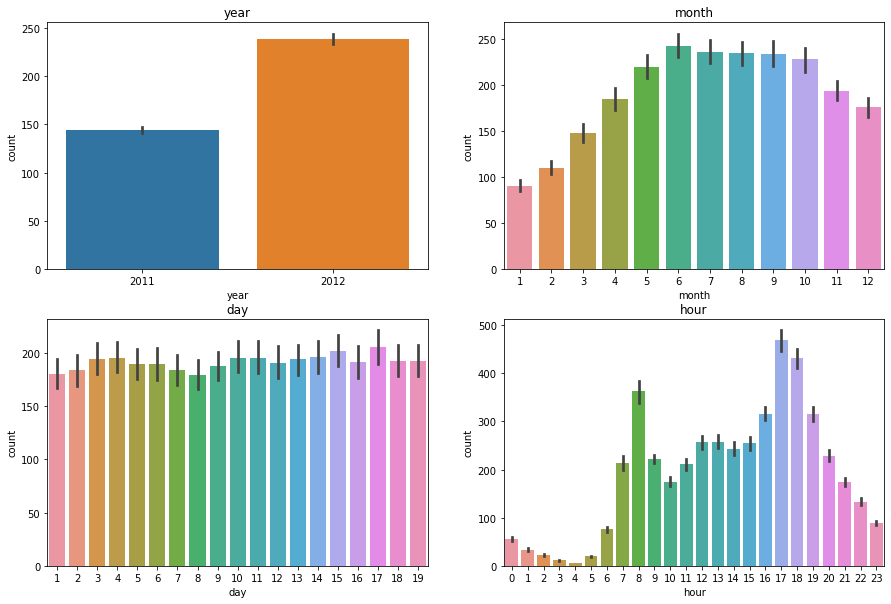

In [226]:
fig, axs = plt.subplots(2,2, figsize=(15, 10))
ax1, ax2, ax3, ax4 = axs.flatten()

axs1 = sns.barplot(x='year', y='count',data=train, ax=ax1).set(title='year')
axs2 = sns.barplot(x='month',y='count',data=train, ax=ax2).set(title='month')
axs3 = sns.barplot(x='day',y='count',data=train, ax=ax3).set(title='day')
axs4 = sns.barplot(x='hour',y='count',data=train, ax=ax4).set(title='hour')

- Year: Rental users have increased by 40% from 2011 to 2012
- Month: May ~ October is the peak rental months
- Day: n/a
- Hour: 8:00AM & 5~6PM are the peak rental hours. Probably due to commuting in both morning,afternoon + leisure activity after work

### 3. Weather relation

- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [268]:
#Let's see which weather type is dominant in this city
train.groupby('weather')[['datetime']].count() / len(train) * 100

,datetime
weather,
1,66.066507
2,26.033437
3,7.890869
4,0.009186


- Weather '1' and '2' dominates most of the days and rarely rains

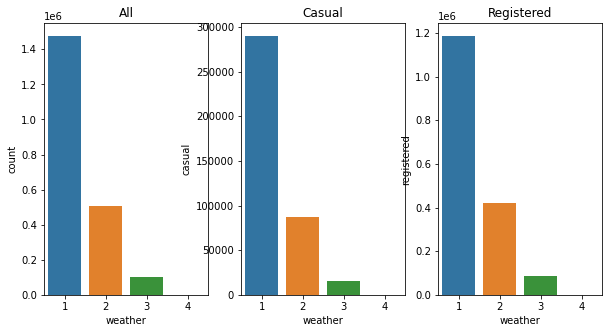

In [300]:
w_train = train.groupby('weather')[['count']].sum().reset_index()
wc_train = train.groupby('weather')[['casual']].sum().reset_index()
wr_train = train.groupby('weather')[['registered']].sum().reset_index()

fig,axs = plt.subplots(1,3,figsize=(10,5))
ax1, ax2, ax3 = axs.flatten()

axs1 = sns.barplot(x='weather',y='count', data=w_train, ax=ax1).set(title = 'All')
axs2 = sns.barplot(x='weather',y='casual', data=wc_train, ax=ax2).set(title = 'Casual')
axs3 = sns.barplot(x='weather',y='registered', data=wr_train, ax=ax3).set(title='Registered')

- The plot trend looks the same for all three plots.
- For both casual and registered users, the rental counts are highest when the weather is sunny, and the counts steadily decrease as weather gets clody and rainy.
- Almost no one (only 1 person) uses rental bikes when it rains/snows hard

### 4. Season Relation

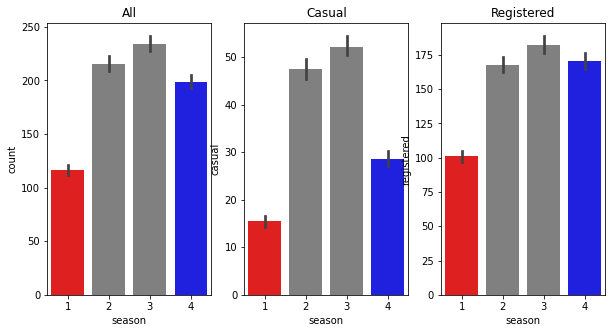

In [305]:
fig, axs = plt.subplots(1,3,figsize=(10,5))
ax1, ax2, ax3 = axs.flatten()
col = ['red', 'grey', 'grey', 'blue']

axs1 = sns.barplot(x='season',y='count',data=train, ax=ax1, palette = col).set(title='All')
axs2 = sns.barplot(x='season',y='casual',data=train, ax=ax2, palette = col).set(title='Casual')
axs3 = sns.barplot(x='season',y='registered',data=train, ax=ax3, palette = col).set(title='Registered')

- Rental counts are high during both season 2 & 3 (April ~ September)
- Registered users rented more often during season 1 & 4 (almost doubled)

### 5. Workday vs Holiday Relation

workingday and holidays are recorded with either '1' or '0' thus,

when holiday : workingday is 

- 1:0 >> holiday
- 0:1 >> workday
- 0:0 >> weekend

In [314]:
train['day_type'] = 'weekend'

is_holi = train['holiday'] == 1
is_week = train['workingday'] == 1

train.loc[(is_holi), 'day_type'] = 'holiday'
train.loc[(is_week), 'day_type'] = 'workingday'

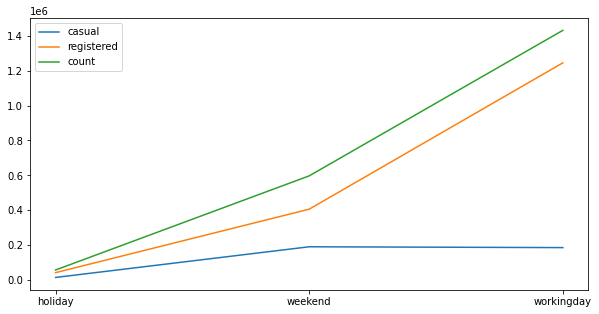

In [326]:
wh = train.groupby('day_type')[['casual','registered','count']].sum()

plt.figure(figsize = (10,5))
plt.plot(wh)
plt.legend(wh.columns)

- Overall rental counts are higher for registered users
- Casual users have higher tendency to rent bikes during weekend (weekend count = workingday count)
- Registered users have higher rent counts during workingdays
    - This tells that commuting is the main purpose of bike rentals for registered users


Text(0.5, 1.0, 'Workingday')

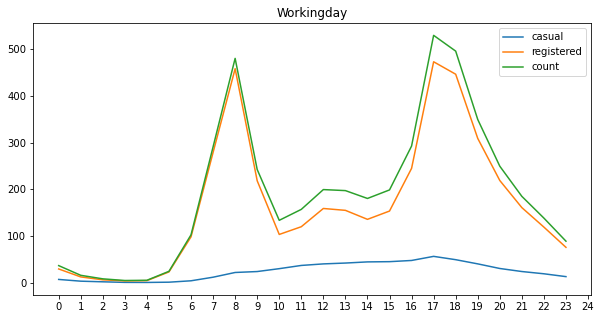

In [332]:
h1 = train.loc[train['day_type'] == 'workingday']
h2 = train.loc[train['day_type'] == 'weekend']
h3 = train.loc[train['day_type'] == 'holiday']

# workingday hourly rental counts
h1_df = h1.groupby('hour')[['casual', 'registered', 'count']].mean()
plt.figure(figsize = (10,5))
plt.plot(h1_df)
plt.xticks(np.arange(0,25))
plt.legend(h1_df.columns)
plt.title('Workingday')

Text(0.5, 1.0, 'Weekend')

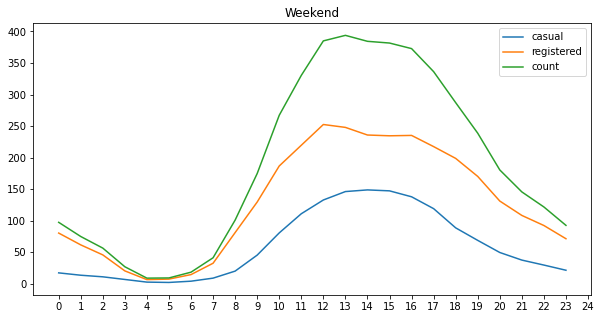

In [333]:
# weekend hourly rental counts
h2_df = h2.groupby('hour')[['casual', 'registered', 'count']].mean()
plt.figure(figsize = (10,5))
plt.plot(h2_df)
plt.xticks(np.arange(0,25))
plt.legend(h2_df.columns)
plt.title('Weekend')

Text(0.5, 1.0, 'Holiday')

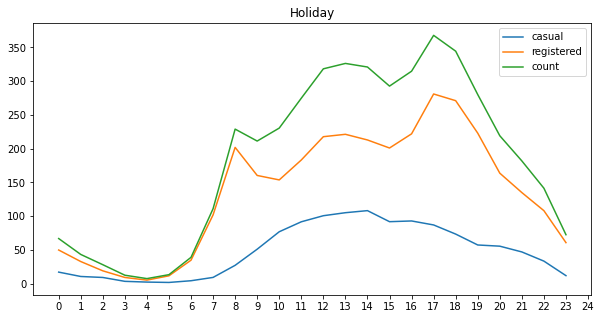

In [334]:
# holiday hourly rental counts
h3_df = h3.groupby('hour')[['casual', 'registered', 'count']].mean()
plt.figure(figsize = (10,5))
plt.plot(h3_df)
plt.xticks(np.arange(0,25))
plt.legend(h3_df.columns)
plt.title('Holiday')

#### Summary
- Workingday: 8AM & 5-6PM are the peak rental hours (due to commuting)
- Weekend + Holiday: Afternoon is the peak rental hours